# Тема исследования: "Выявление приоритетных гипотез для увеличения выручки интернет-магазина"

Вместе с отделом маркетинга нами был подготовлен список гипотез для увеличения выручки.
Перед нами были поставлены две задачи: 
- Приоритизация гипотез;
- Проведение A/B-тестирования с последующим анализом результатов. 

Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача:

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Примечание №1: При описании данных заказов, для удобства, будем исходить из того, что стоимость заказов оценивается в рублях.
Примечание №2: Далее, в исследовании, при встрече слов "столбец" и "колонка" следует считать их синонимами.**

---

Ход исследования:

## Часть 1. Приоритизация гипотез.

### Шаг 1. Открыть файл с данными и изучить общую информацию

Импортируем полезные инструменты

In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import datetime as dt

In [4]:
import numpy as np

In [5]:
import math as mth

In [6]:
import matplotlib.pyplot as plt

Отключим ненужные предупреждения Питона

In [7]:
import warnings
warnings.filterwarnings('ignore')

Сбросим ограничения на демонстрацию количества столбцов, строк и увеличим разрешение на вывод количества символов в строке, а также округлим выведение значений типа float до двух знаков после запятой.

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 120)
 
pd.options.display.float_format = '{:,.2f}'.format

Откроем файл с сформированными гипотезами

In [9]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [10]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Как мы можем заметить, типы данных соответствуют тем значениям, которые представлены в столбцах. Даже беглого осмотра достаточно (позволяют размеры таблицы), чтобы прийти к заключению о том, что пропуска значений, дубликатов или просто некорректно введёных данных в таблице не присутствует. Названия столбцов также адекватно отображает своё содержимое.
  Вывод: можно смело приступать к работе с таблицей.

Описание данных:

Данные для таблицы hypothesis:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Задача №1: Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [11]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hyp_ice = hypothesis.sort_values(by='ICE', ascending=False)[['Hypothesis', 'ICE']]
hyp_ice

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Text(0, 0.5, 'ICE')

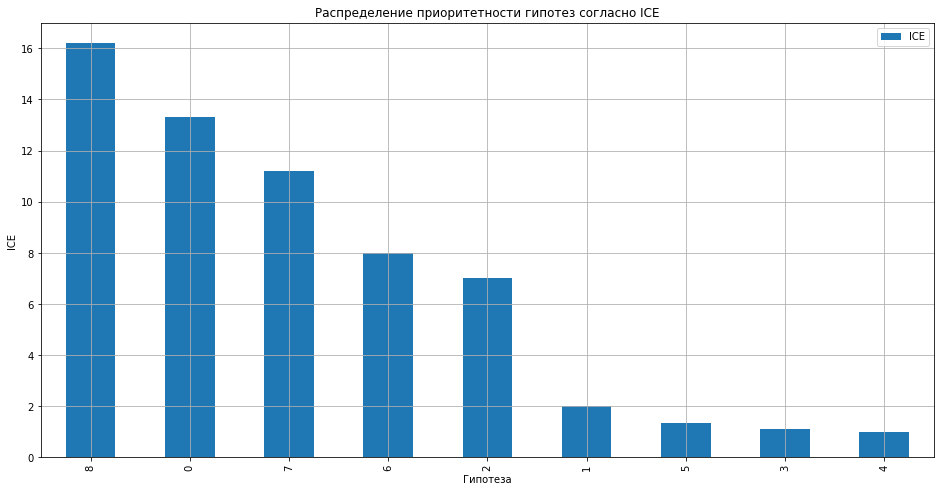

In [12]:
hyp_ice.plot(
    kind='bar',
    grid=True,
    figsize=(16, 8))

plt.title('Распределение приоритетности гипотез согласно ICE')
plt.xlabel('Гипотеза') 
plt.ylabel('ICE')

Наиболее перспективными гипотезами по ICE являются гипотезы под номерами: 8, 0, 7, 6, 2

Задача №2: Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

In [13]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hyp_rice = hypothesis.sort_values(by='RICE',ascending=False)[['Hypothesis', 'RICE']]
hyp_rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Порядок расстановки приоритетных гипотез в RICE поменялся, но сами приоритетные гипотезы остались теми же, что были и в ICE. На этот раз: 7, 2, 0, 6, 8

Text(0, 0.5, 'RICE')

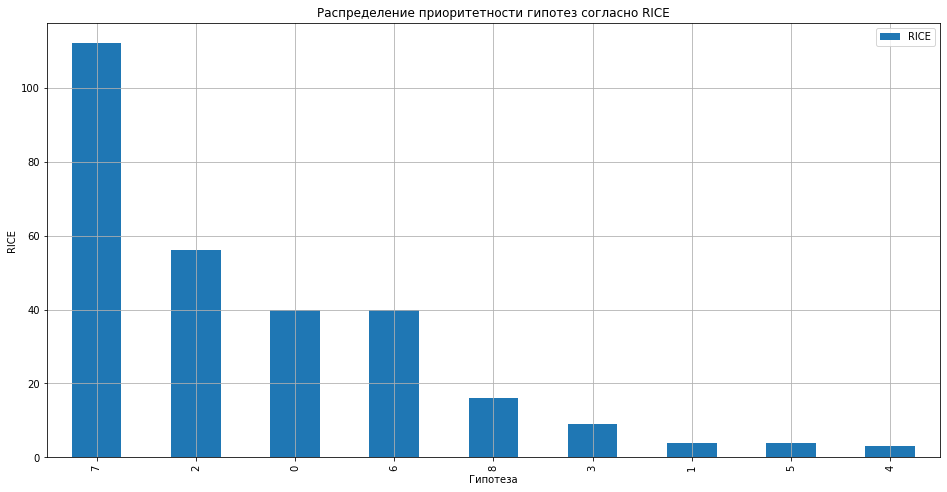

In [14]:
hyp_rice.plot(
    kind='bar',
    grid=True,
    figsize=(16, 8))

plt.title('Распределение приоритетности гипотез согласно RICE')
plt.xlabel('Гипотеза') 
plt.ylabel('RICE')

Задача №3: Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Порядок расстановки приоритетных гипотез в RICE поменялся, но сами приоритетные гипотезы остались теми же, что были и в ICE. На этот раз: 7, 2, 0, 6, 8. Так получилось по причине высокого числа пользователей, которых должны затронуть изменения, помноженные на высокие ожидания позитивных изменений и уверенность в влиянии реализации этих гипотез на пользователей. Кроме того, на занятие лидирующих позиций для этих гипотез оказала влияние относительно недорогая стоимость их тестирования. 

## Часть 2. Анализ A/B-теста

### Шаг 1. Открыть файл с данными и изучить общую информацию

Изучим файл с данными о заказах

In [15]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Описание данных:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Посмотрим внимательнее на эту таблицу:

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
orders.describe()

,transactionId,visitorId,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


In [18]:
orders.mode().head()

,transactionId,visitorId,date,revenue,group
0,1062393,"2,458,001,652.00",2019-08-05,990.00,B
1,4919758,"4,256,040,402.00",NaN,nan,NaN
2,7210578,nan,NaN,nan,NaN
3,8131427,nan,NaN,nan,NaN
4,11068804,nan,NaN,nan,NaN


In [19]:
orders.duplicated().sum()

0

При поверхностном взгляде на таблицу orders, можно отметить:
- тип данных необходимо будет исправить только у колонки с датами (date), у остальных столбцов типы данных адекватны своему назначению;
- названия столбцов адекватно отбражают своё содержимое и не требуют правок;
- дубликаты не обнаружены;
- медианная стоимость заказа через интернет-магазин (2978 рублей) почти втрое меньше средней (8348 рублей), что явно свидетельствует о наличии выбросов в большую сторону;
- при этом самой часто встречающейся стоимостью заказа является сумма в 990 рублей.

Изучим файл с данными о посещениях интернет-магазина:

In [20]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Описание данных:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Изучим информацию о датасете:

In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
visitors.describe()

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [23]:
visitors.mode().head()

,date,group,visitors
0,2019-08-01,A,490.00
1,2019-08-02,B,610.00
2,2019-08-03,NaN,654.00
3,2019-08-04,NaN,718.00
4,2019-08-05,NaN,nan


In [24]:
visitors.duplicated().sum()

0

По аналогии с предыдущим файлом сделаем краткие выводы о таблицу visitors. 
- пропусков значений и дубликатов не обнаружено;
- названия столбцов адекватно отбражают своё содержимое и не требуют правок;
- изменения типа данных требует только столбец с датами (date);
- медианное и среднее значения количества посетителей в сутки не сильно отличаются друг от друга (624 против 607)

**Задачи:**
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

#### Задача №1: Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

Исправим для начала типы данных с датами в таблицах

In [25]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [26]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:

- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [27]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:

In [28]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [29]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Объединим обе таблицы в одной с понятными названиями столбцов:

In [30]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [32]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Строим график выручки группы А, строим график выручки группы B

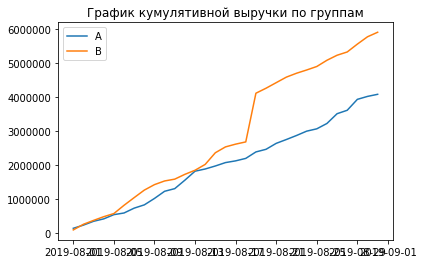

In [33]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.legend() 

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в одной точке резко растёт. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 


#### Задача №2: Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

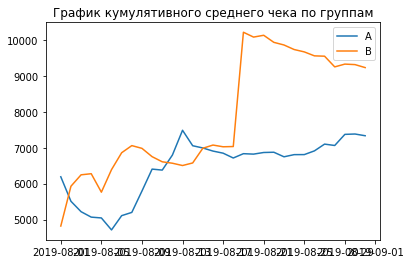

In [34]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend() 


Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.


#### Задача №3: Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline():

Соберём данные в одном датафрейме

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Поcтроим отношение средних чеков

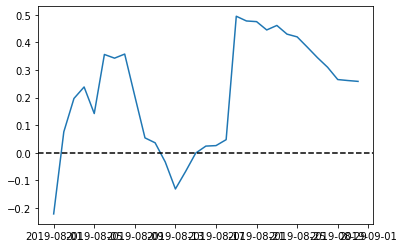

In [36]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет». Эти "скачки" свидетельствуют о наличии крупных заказов.

#### Задача №4: Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

In [37]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [38]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

Посчитаем кумулятивную конверсию

In [39]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные по группе A

In [40]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

Отделим данные по группе B

In [41]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим графики

['2019-08-01', '2019-08-31', 0, 0.04]

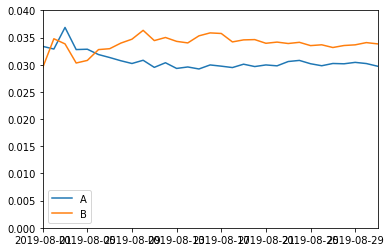

In [42]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.04]) 

Симметричный график получился. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Задача №5: Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

['2019-08-01', '2019-08-31', -0.6, 0.6]

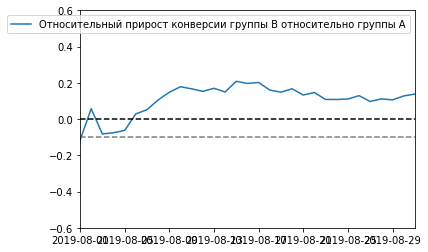

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6]) 

В начале теста группа B несколько проигрывала группе A, но затем вырвалась вперёд и зафиксировалась. 
В целом отношение конверсии можно считать практически установившимся.

#### Задача №6: Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [44]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

ordersByUsers.sort_values(by='transactionId', ascending=False).head(10) 


,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. 

Построим точечную диаграмму числа заказов на одного пользователя:

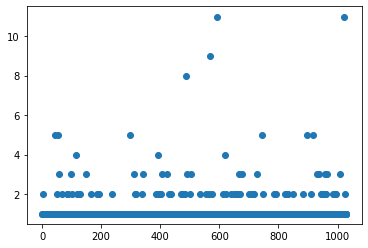

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId']) 

Построим гистрограмму распределения количества заказов на одного пользователя.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

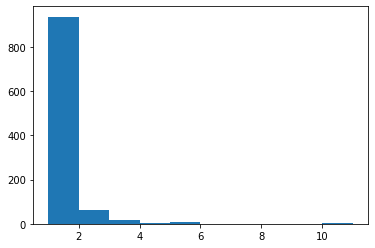

In [46]:
plt.hist(ordersByUsers['transactionId']) 

Большинство покупателей заказывали только один раз. Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

#### Задача №7: Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [47]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. Один процент пользователей заказывал четыре раза.
Разумно выбрать 2 или 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Задача №8: Построить точечный график стоимостей заказов. Сделать выводы и предположения.

Изучим стоимости заказов

[0, 1210, 0, 200000]

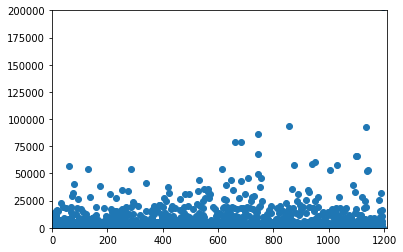

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1210, 0, 200000])

Есть немного дорогих заказов (из очевидных - 2). По графику можно выбрать границу аномальных заказов 20 000. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

#### Задача №9: Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [49]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Видимо, разумно было бы обозначить границу для определения аномальных заказов в 28000 рублей.

#### Задача №10: Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

In [50]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [51]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Начнём с подготовки данных.

In [52]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Информация о столбцах:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [53]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.



In [54]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Для сравнения конверсии между группами по "сырым" данным, сформулируем гипотезы:
- Н0 = статистически значимых различий в конверсии между группами нет
- Н1 = статистически значимые различия в конверсии между группами есть
- Зададим критический уровень статистической значимости равный 5%: alpha = 0.05

In [55]:
alpha = 0.05

p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print(f'p_value = {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть')
else:
    print('Не удаётся отвергнуть нулевую гипотезу, статистически значимых различий в конверсии между группами нет')

p_value = 0.008396177528376304
Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть


Выведем относительный прирост конверсии группы B:

In [56]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


Вывод: По «сырым» данным существуют статистически значимые различия в конверсии между группами A и B.
Относительный прирост конверсии группы B составляет 13.8%.

#### Задача №11: Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

Сформулируем гипотезы:
- Н0 = в среднем чеке нет статистически значимых различий между группами
- Н1 = в среднем чеке есть статистически значимые различия между группами
- при alpha = 0.05
- А также найдём относительные различия в среднем чеке между группами.

In [57]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу, в среднем чеке есть статистически значимые различия между группами')
else:
    print('Не удаётся отвергнуть нулевую гипотезу, в среднем чеке нет статистически значимых различий между группами')
print('p_value равно {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами составляют {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Не удаётся отвергнуть нулевую гипотезу, в среднем чеке нет статистически значимых различий между группами
p_value равно 0.365
Относительные различия в среднем чеке между группами составляют 0.259


Относительные различия в среднем чеке между группами составляют 25 %

In [58]:
print("Средний чек группы A составляет {0:.3f} ".format(orders[orders['group']=='A']['revenue'].mean()), 'рубля')

Средний чек группы A составляет 7333.578  рубля


In [59]:
print("Средний чек группы B составляет {0:.3f} ".format(orders[orders['group']=='B']['revenue'].mean()), 'рубля')

Средний чек группы B составляет 9230.875  рубля


#### Задача №12: Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

Напомним, что найденные в прошлых задачах 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

Вычислим пороговые значения 95-го перцентиля для:
- количества заказов на одного пользователя по группам (А и В);
- среднего чека

И присвоим эти значения переменным

In [60]:
quantile95_for_orders_a = ordersByUsersA['orders'].quantile(0.95)
quantile95_for_orders_a

2.0

In [61]:
quantile95_for_orders_b = ordersByUsersB['orders'].quantile(0.95)
quantile95_for_orders_b

2.0

In [62]:
quantile95_for_revenue = orders['revenue'].quantile(0.95)
quantile95_for_revenue

28000.000000000004

In [63]:


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > quantile95_for_orders_a]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > quantile95_for_orders_b]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > quantile95_for_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


Всего 74 аномальных пользователя.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

Для сравнения конверсии между группами по "очищенным" данным, сформулируем гипотезы:
- Н0 = статистически значимых различий в конверсии между группами нет
- Н1 = статистически значимые различия в конверсии между группами есть
- Зададим критический уровень статистической значимости равный 5%: alpha = 0.05

In [64]:
alpha = 0.05

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [65]:
print('p_value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p_value = 0.007
Относительный прирост конверсии группы B = 0.173


In [66]:
if p_value < alpha:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть')
else:
    print('Не удаётся отвергнуть нулевую гипотезу, статистически значимых различий в конверсии между группами нет')

Не удаётся отвергнуть нулевую гипотезу, статистически значимых различий в конверсии между группами нет


Результаты по конверсии практически не изменились. 

In [67]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Сформулируем гипотезы:
- Н0 = в среднем чеке нет статистически значимых различий между группами
- Н1 = в среднем чеке есть статистически значимые различия между группами
- при alpha = 0.05
- А также найдём относительные различия в среднем чеке между группами.

In [68]:
alpha = 0.05
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print(
    'p_value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные различия в среднем чеке между группами составляют {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
if p_value < alpha:
    print('Отвергаем нулевую гипотезу, в среднем чеке есть статистически значимые различия между группами')
else:
    print('Не удаётся отвергнуть нулевую гипотезу, в среднем чеке нет статистически значимых различий между группами')

p_value = 0.369
Относительные различия в среднем чеке между группами составляют -0.020
Не удаётся отвергнуть нулевую гипотезу, в среднем чеке нет статистически значимых различий между группами


P-value увеличился, но и разница между сегментами сократилась с 25% до 2%.

In [69]:
print("Средний чек группы А после фильтрации аномалий составляет {0:.3f}".format(orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)), 
            )
        ]['revenue'].mean()), 'рублей')

Средний чек группы А после фильтрации аномалий составляет 5166.609 рублей


In [70]:
print("Средний чек группы В после фильтрации аномалий составляет {0:.3f} ".format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)), 
            )
        ]['revenue'].mean()), 'рублей')

Средний чек группы В после фильтрации аномалий составляет 5065.218  рублей


#### Задача №14: Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Имеющиеся факты:
- По «сырым» данным существуют статистически значимые различия в конверсии между группами A и B, также, как и по данным после фильтрации аномалий. Относительный прирост конверсии группы B составляет 13.8% (14.8% после фильтрации).
- Однако по среднему чеку не удалось найти статистически значимых отличий ни по "сырым данным", ни по данным после фильтрации аномалий. При этом относительные различия в среднем чеке составляют 25% в пользу группы В в "сырых" данных (средний чек группы A составляет 7333.578  рубля, а средний чек группы B составляет 9230.875  рубля)  и 2% в пользу группы А после фильтрации аномалий (5166.609 рубля средний чек для группы А и 5065.218 рублей для группы В).

Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.

# Выводы:

Несколько слов о качестве имеющихся данных:
- пропусков значений и дубликатов не обнаружено;
- названия столбцов адекватно отбражают своё содержимое и не требуют правок;
- изменения типа данных требовал только столбец с датами (date) в таблицах visitors и orders;

Для ICE и для RICE приоритетными являются гипотезы под номерами: 8, 0, 7, 6, 2

Порядок расстановки приоритетных гипотез в RICE поменялся, но сами приоритетные гипотезы остались теми же, что были и в ICE. На этот раз: 7, 2, 0, 6, 8. Так получилось по причине высокого числа пользователей, которых должны затронуть изменения, помноженные на высокие ожидания позитивных изменений и уверенность в влиянии реализации этих гипотез на пользователей. Кроме того, на занятие лидирующих позиций для этих гипотез оказала влияние относительно недорогая стоимость их тестирования.

In [71]:
hyp_ice

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [72]:
hyp_rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


- По «сырым» данным существуют статистически значимые различия в конверсии между группами A и B, также, как и по данным после фильтрации аномалий. Относительный прирост конверсии группы B составляет 13.8% (14.8% после фильтрации).
- Однако по среднему чеку не удалось найти статистически значимых отличий ни по "сырым данным", ни по данным после фильтрации аномалий. При этом относительные различия в среднем чеке составляют 25% в пользу группы В в "сырых" данных (средний чек группы A составляет 7333.578 рубля, а средний чек группы B составляет 9230.875 рубля) и 2% в пользу группы А после фильтрации аномалий (5166.609 рубля средний чек для группы А и 5065.218 рублей для группы В).
- Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.